In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

image.png carregada em escala de cinza
equalização
threshold com OTSU

Destaca algumas das linhas de plantio
Ocorre um problema com iluminação na parte esquerda.


Para a image5.jpg deu muito certo:
img = cv2.imread("image4.jpg", cv2.IMREAD_GRAYSCALE)
img_equalized = cv2.equalizeHist(img) # Equalização de uma imagem
ret2,th2 = cv2.threshold(img_equalized,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU) # Limiarização de OTSU

[[1 1 1]]


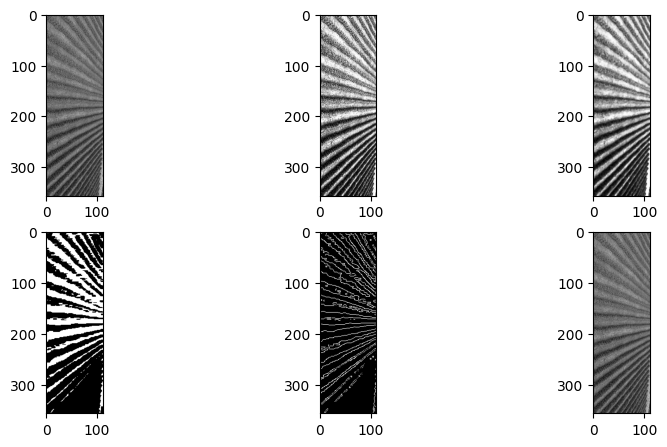

In [121]:
element = cv2.getStructuringElement(cv2.MORPH_RECT, (2 * 1 + 1, 1),(1,0))
print(element)

imagem = cv2.imread("image9.jpg", cv2.IMREAD_GRAYSCALE)
imagem2 = copy.deepcopy(imagem)
#imagem_suavizada = cv2.GaussianBlur(imagem, (5, 5), 0)
img_equalized = cv2.equalizeHist(imagem) # Equalização de uma imagem
dst = cv2.medianBlur(img_equalized, 3) # Filtro de mediana
_,img_thresh = cv2.threshold(dst,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU) # Limiarização de OTSU
#img_thresh = 255 - img_thresh
imagem_dilatada = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, element)
imagem_dilatada = cv2.erode(imagem_dilatada, element, iterations=2)
bordas = cv2.Canny(imagem_dilatada, 50, 150)
linhas = cv2.HoughLines(bordas, rho=1, theta=np.pi/180, threshold=100)
# Desenhar as linhas na imagem original
if linhas is not None:
    for linha in linhas:
        x1, y1, x2, y2 = linha[0]
        cv2.line(imagem2, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(10, 8))
plt.subplot(3,3,1)
plt.imshow(imagem, cmap='gray', vmin=0, vmax=255)
plt.subplot(3,3,2)
plt.imshow(img_equalized, cmap='gray', vmin=0, vmax=255)
plt.subplot(3,3,3)
plt.imshow(dst, cmap='gray', vmin=0, vmax=255)
plt.subplot(3,3,4)
plt.imshow(imagem_dilatada, cmap='gray', vmin=0, vmax=255)
plt.subplot(3,3,5)
plt.imshow(bordas, cmap='gray', vmin=0, vmax=255)
plt.subplot(3,3,6)
plt.imshow(imagem2, cmap='gray', vmin=0, vmax=255)


In [105]:
img = cv2.imread("image4.jpg", cv2.IMREAD_GRAYSCALE)
img_equalized = cv2.equalizeHist(img) # Equalização de uma imagem
img_blur = cv2.GaussianBlur(img_equalized,(5,5),0) # Filtro gaussiano
_,img_thresh = cv2.threshold(img_blur,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU) # Limiarização de OTSU

#img_equalized_median = cv2.medianBlur(img_equalized, 3) # Filtro de mediana
#ret2,th2 = cv2.threshold(img_equalized,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU) # Limiarização de OTSU
#dst = cv2.medianBlur(th2, 7) # Filtro de mediana
#edges = cv2.Canny(dst,0,255) #Identificação de bordas

kernel = np.ones((5, 5), np.uint8)
imagem_erodida = cv2.erode(img_thresh, kernel2, iterations=1)
#imagem_dilatada = cv2.dilate(imagem, kernel, iterations=1)

imagem_fechada = cv2.morphologyEx(imagem_erodida, cv2.MORPH_CLOSE, kernel2)


dst = cv2.Canny(img_equalized, 50, 200, None, 3)
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

plt.figure(figsize=(10, 8))
plt.subplot(3,3,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(3,3,2)
plt.imshow(img_equalized, cmap='gray', vmin=0, vmax=255)
plt.subplot(3,3,3)
plt.imshow(img_blur, cmap='gray', vmin=0, vmax=255)
plt.subplot(3,3,4)
plt.imshow(img_thresh, cmap='gray', vmin=0, vmax=255)
plt.subplot(3,3,5)
plt.imshow(dst, cmap='gray', vmin=0, vmax=255);

NameError: name 'kernel2' is not defined